## Week 2 - GoLorry Data Uploading and Cleaning


In [1]:
import pandas as pd
import numpy as np

from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston

import scipy
from scipy import stats
import sklearn
import json

%matplotlib inline
import matplotlib.pyplot as plt



## Importing Data Files
### Importing Orders data (completed and not completed)
Data was imported 
Missing states were filled in from JSon data (both origin and destination)

New city variable was put in for both origin and destination cities

Time between creation and departure was measured as 'advance booking' in days

Time between departure and arrival estimate was measured as 'shipping time' in days



In [2]:
orders = pd.read_csv('jennifer_orders.csv')

orders['status'].replace(to_replace='In Transit', value="Completed")
orders['price_per_ton'] = orders['payment_amount']/orders['weight']
orders.head()



,Unnamed: 0,id,order_number,departure_requeststart,arrival_estimate,creation_date,origin,destination,material,weight,...,origin_lat,origin_lng,destination_state,origin_state,destination_city_id,destination_city_distance,origin_city_id,origin_city_distance,payment_amount,price_per_ton
0,1,2695,747357.0,2016-06-01 02:30:00+00:00,2016-06-01 09:30:00+00:00,2016-05-31 02:10:59.537728+00:00,"{""address_components"":[{""long_name"":""Gundugola...","{""address_components"":[{""long_name"":""Allavaram...",Agricultural Products,17,...,16.779743,81.231230,NaN,NaN,NaN,NaN,NaN,NaN,8100.0,476.470588
1,2,4672,NaN,2016-07-31 10:30:00+00:00,2016-08-02 17:30:00+00:00,2016-07-30 03:01:23.473615+00:00,"{""address_components"":[{""long_name"":""Guntur"",""...","{""address_components"":[{""long_name"":""Irinjalak...",Agricultural Products,17,...,16.080949,80.331462,Kerala,Andhra Pradesh,NaN,NaN,NaN,NaN,32000.0,1882.352941
2,3,5224,NaN,2016-08-15 10:30:00+00:00,2016-08-18 20:28:45.720000+00:00,2016-08-12 14:23:50.871473+00:00,"{""address_components"":[{""long_name"":""Thimmapur...","{""address_components"":[{""long_name"":""Thiruvana...",Agricultural Products,105,...,16.147296,80.205365,Kerala,Andhra Pradesh,NaN,NaN,NaN,NaN,216000.0,2057.142857
3,4,5629,NaN,2016-08-22 10:30:00+00:00,2016-08-25 09:10:25.200000+00:00,2016-08-21 04:23:48.416189+00:00,"{""address_components"":[{""long_name"":""Ganapavar...","{""address_components"":[{""long_name"":""Erode"",""s...",Agricultural Products,100,...,16.699377,81.463549,Tamil Nadu,Andhra Pradesh,NaN,NaN,NaN,NaN,163300.0,1633.000000
4,6,3859,657158.0,2016-07-08 10:30:00+00:00,2016-07-09 14:30:00+00:00,2016-07-08 07:29:04.430073+00:00,"{""address_components"":[{""long_name"":""Enikepadu...","{""address_components"":[{""long_name"":""Jakkalach...",Agricultural Products,17,...,16.518881,80.361341,Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,19050.0,1120.588235


In [3]:
deJSonState = []
deJSonCity = []
orJSonState = []
orJSonCity = []

for i in range(len(orders)):
    originDict= json.loads(orders.origin[i])
    tlist = originDict['address_components']
    state = ""
    city = ""
    j = 0
    while state == "" and j< len(tlist):
        if tlist[j]['types']==[]:
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_2':
            city = tlist[j]['long_name']
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_1':
            state = tlist[j]['long_name']
        else:
            j+=1
    orJSonState.append(state)
    orJSonCity.append(city)
    
    destDict= json.loads(orders.destination[i])
    tlist = destDict['address_components']
    city = ""
    state = ""
    j = 0
    while state == "" and j<len(tlist):
        if tlist[j]['types']==[]:
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_2':
            city = tlist[j]['long_name']
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_1':
            state = tlist[j]['long_name']
        else:
            j+=1
    deJSonState.append(state)
    deJSonCity.append(city)

In [4]:
newColumns = ['deJSonState','orJSonState','destination_city','origin_city']
oldColumns = ['destination_state','origin_state']

for name in newColumns:
    orders[name] = ""

orders["deJSonState"]=deJSonState
orders["orJSonState"]=orJSonState
orders["destination_city"]=deJSonCity
orders["origin_city"]=orJSonCity

for column in range(2):
    newName = newColumns[column]
    oldName = oldColumns[column]
    for i in range(len(orders)):
        if type(orders[oldName][i]) == float and type(orders[newName][i])!= float:
            orders[oldName][i]=orders[newName][i]

orders.to_csv('/home/jensteele03/GoLorry/cleanOrders.csv')


/home/jensteele03/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
columnNames =['id', 'order_number', 'departure_requeststart', 'arrival_estimate', 'creation_date', 'material', 'weight', 'urgent_shipping', 'status', 'shipper_id', 'distance', 'touchings', 'destination_lat', 'destination_lng', 'origin_lat', 'origin_lng', 'destination_state', 'origin_state', 'destination_city', 'origin_city', 'payment_amount', 'price_per_ton']
cleanData = orders.loc[:, columnNames]
cleanData["departure_requeststart"] = pd.to_datetime(cleanData["departure_requeststart"])
cleanData["creation_date"] = pd.to_datetime(cleanData["creation_date"])
cleanData["arrival_estimate"] = pd.to_datetime(cleanData["arrival_estimate"])

adv = cleanData["departure_requeststart"] - cleanData["creation_date"]
cleanData["advance_booking"] = adv/np.timedelta64(1,'D')
ship = cleanData["arrival_estimate"] - cleanData["departure_requeststart"]
cleanData["avg_shipping_time"] = (ship / np.timedelta64(1,'D')) / cleanData["distance"]
earliest = min(cleanData["departure_requeststart"])
relativeDate = cleanData["departure_requeststart"] - earliest
cleanData["orderDate"] = relativeDate / np.timedelta64(1,'D')

cleanData['order_number'].fillna(0)
orders_with_numbers = cleanData[~np.isnan(cleanData['order_number'])]
orders_with_numbers["order_number"] = orders_with_numbers["order_number"].astype(int)
print orders_with_numbers.head()

      id  order_number departure_requeststart    arrival_estimate  \
0   2695        747357    2016-06-01 02:30:00 2016-06-01 09:30:00   
4   3859        657158    2016-07-08 10:30:00 2016-07-09 14:30:00   
5   2694        487112    2016-06-01 02:30:00 2016-06-01 08:30:00   
8   2692        501037    2016-06-01 02:30:00 2016-06-01 08:30:00   
14  2687        393764    2016-05-31 02:30:00 2016-06-01 09:30:00   

                creation_date               material  weight urgent_shipping  \
0  2016-05-31 02:10:59.537728  Agricultural Products      17           False   
4  2016-07-08 07:29:04.430073  Agricultural Products      17            True   
5  2016-05-31 02:09:55.655028  Agricultural Products      17           False   
8  2016-05-31 02:08:45.828542  Agricultural Products      17           False   
14 2016-05-30 11:49:34.159370  Agricultural Products      17           False   

       status  shipper_id     ...      origin_lng  destination_state  \
0   Completed          42     ..

/home/jensteele03/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Profit and Loss Data
Data includes only completed orders, and includes (some) cost data.  

In [6]:
pnl = pd.read_csv('jennifer_pnl.csv')
pnl.head()

,Unnamed: 0,Status,order_number,Charge,actual_pnl
0,1,Complete,659754,31600,NaN
1,2,Complete,294728,20570,NaN
2,3,Cancelled,442345,19000,NaN
3,4,Cancelled,154884,11200,NaN
4,5,Complete,104904,54000,NaN


### Market Pricing Data


In [7]:
new_market = pd.read_csv('jennifer_new_market.csv')
old_market = pd.read_csv('jennifer_old_market.csv')
new_market.head()


,Origin,Origin State,Destination,Destination State,Distance,17 - Rs/ton,21 - Rs/ton,10 - Rs/ton,Broker,Date,Comments
0,Ranasthalam,Andhra Pradesh,Vizag,Andhra Pradesh,900,"2,150",NaN,NaN,NaN,2016-04-15,NaN
1,Hyderabad,Telangana,Kaikaluru,Andhra Pradesh,350,735,NaN,NaN,NaN,2016-04-20,NaN
2,Solapur,Maharastra,Vizag,Andhra Pradesh,940,"2,250",NaN,NaN,NaN,2016-04-20,NaN
3,Anantapur,Andhra Pradesh,Vijayawada,Andhra Pradesh,484,800,NaN,NaN,NaN,2016-04-22,NaN
4,Vijayawada,Andhra Pradesh,Vizag,Andhra Pradesh,340,880,NaN,NaN,NaN,2016-04-23,NaN


## Merging PnL and orders data (adding descriptive features to PnL data)

In [8]:
merged_set = pd.merge(orders_with_numbers, pnl, how='right', on='order_number')
len(merged_set)
merged_set.to_csv('/home/jensteele03/GoLorry/orders_with_details.csv')

## A few data visualizations

In [9]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

colors = sns.color_palette(n_colors=7)
color_dict = {key: value for key, value in zip(sorted(orders.status.unique()), colors)}

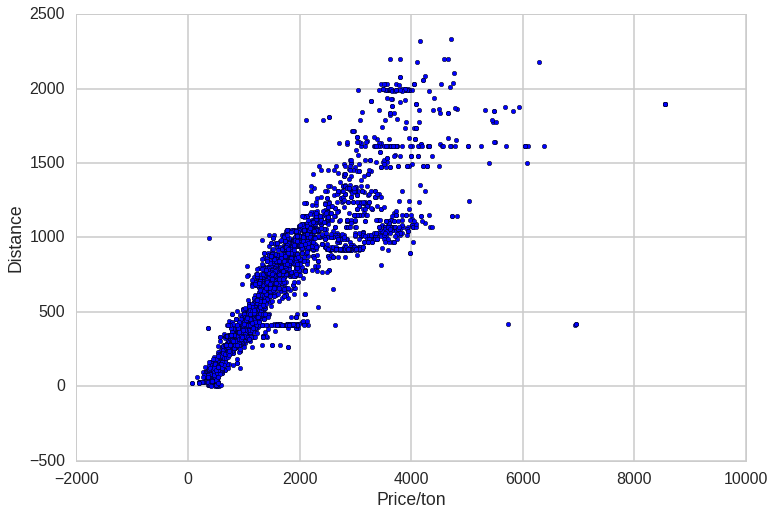

In [10]:
plt.scatter(orders['price_per_ton'], 
            orders.distance)
plt.xlabel("Price/ton")
plt.ylabel("Distance");

Completed
Discarded
Cancelled
Poached
Confirmed
Created


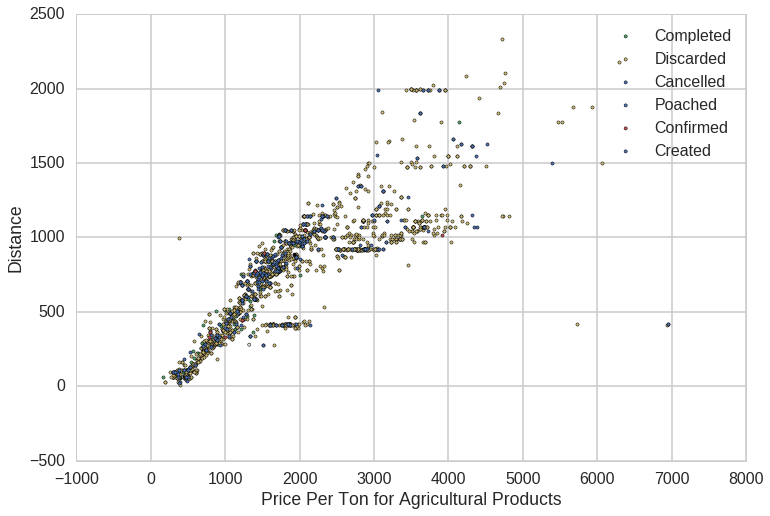

In [11]:
ag_orders = orders[orders.material=='Agricultural Products']
ag_orders.head()
for stati in ag_orders.status.unique():
    print stati
    plt.scatter(ag_orders[ag_orders.status == stati].price_per_ton,
                ag_orders[ag_orders.status == stati].distance, 
                c=color_dict[stati],
                s=10,
                label=stati,)
plt.xlabel("Price Per Ton for Agricultural Products")
plt.ylabel("Distance")
plt.legend()
plt.savefig("ex1.png")

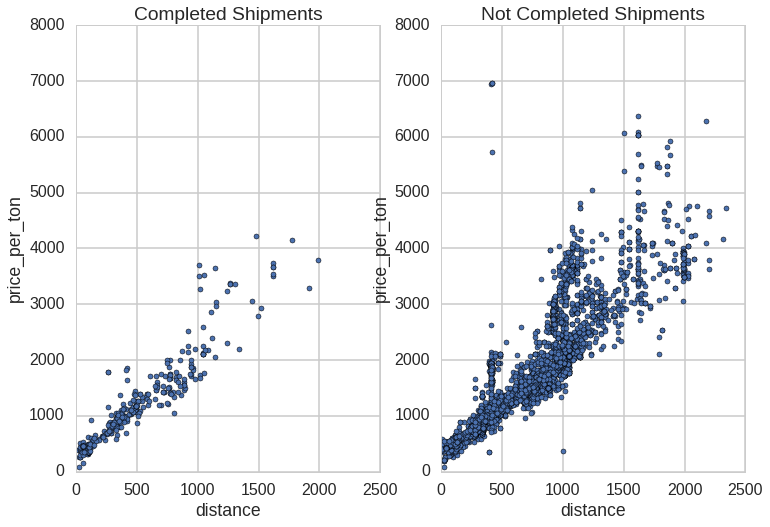

In [13]:
completed_orders = orders[orders.status=='Completed']
notCompleted_orders = orders[orders.status != 'Completed']

fig, axs = plt.subplots(1,2)


completed_orders.plot.scatter("distance", "price_per_ton", ax=axs[0],s=25)
notCompleted_orders.plot.scatter("distance", "price_per_ton", s=25,ax=axs[1])
axs[0].set_xlim([0, 2500])
axs[0].set_ylim([0, 8000])

axs[1].set_xlim([0, 2500])
axs[1].set_ylim([0, 8000])

axs[0].set_title("Completed Shipments")
axs[1].set_title("Not Completed Shipments")
#plt.savefig("ex1.png")

#orders.plot.scatter(notCompleted_orders.price_per_ton,notCompleted_orders.distance,s=25,ax=axs[1])
plt.show()

In [77]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats



model = smf.ols('payment_amount ~ distance + origin_state + destination_state \
                + weight + shipper_id + advance_booking + orderDate', cleanData).fit()
print(model.summary()) 


                            OLS Regression Results                            
Dep. Variable:         payment_amount   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     352.8
Date:                Thu, 15 Sep 2016   Prob (F-statistic):               0.00
Time:                        13:25:02   Log-Likelihood:                -46601.
No. Observations:                4028   AIC:                         9.330e+04
Df Residuals:                    3979   BIC:                         9.361e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------

In [79]:
ols1 = cleanData.copy()
top_comp_ids = [42,11,21,1,10,3,9,24]
id_dummies = pd.get_dummies(cleanData['shipper_id'])

id_dummies = id_dummies[top_comp_ids]
#id_dummies.rename(index=int, columns={42: "id_42", 11: "id_11",21:"id_21",1:"id_1",10:"id_10",3:"id_3",9:"id_9",24:"id_24"})
id_dummies.columns=['id_42','id_11','id_21','id_1','id_10','id_3','id_9','id_24']
print id_dummies.head()

west_bengal_dummy=[]
for i in range(len(cleanData)):
    if cleanData.origin_state[i]=='West Bengal' or cleanData.destination_state[i]=='West Bengal':
        West_Bengal = 1
    else:
        West_Bengal = 0
    west_bengal_dummy.append(West_Bengal)

ols1 = pd.concat([cleanData,id_dummies],axis=1)
ols1 = pd.concat([ols1,west_bengal_dummy],axis=1)
print ols1.head()

model = smf.ols('payment_amount ~ distance + origin_state + destination_state \
                + weight + advance_booking + orderDate + id_42 + id_11 + id_21 + id_1 + id_10 + id_3 + id_9 + id_24', ols1).fit()
print(model.summary()) 


   id_42  id_11  id_21  id_1  id_10  id_3  id_9  id_24
0    1.0    0.0    0.0   0.0    0.0   0.0   0.0    0.0
1    0.0    0.0    1.0   0.0    0.0   0.0   0.0    0.0
2    0.0    0.0    0.0   0.0    0.0   0.0   0.0    1.0
3    0.0    0.0    0.0   0.0    0.0   0.0   0.0    0.0
4    0.0    1.0    0.0   0.0    0.0   0.0   0.0    0.0


TypeError: cannot concatenate a non-NDFrame object

In [38]:

completed_orders["shipper_id"].value_counts()
cleanData["shipper_id"].value_counts()

1     930
24    388
70    270
21    230
20    216
11    192
50    153
72    142
42    125
36    106
25     95
32     82
2      73
15     66
82     61
26     60
9      59
40     58
3      50
8      48
34     47
10     46
30     39
81     39
49     36
76     35
23     29
12     28
16     27
5      26
     ... 
19     14
85     10
48     10
7      10
74      9
65      8
66      8
67      7
6       7
27      6
22      5
86      4
18      4
61      4
4       3
89      3
62      3
87      3
79      2
75      2
73      2
43      2
69      2
39      2
41      2
28      1
71      1
78      1
88      1
64      1
Name: shipper_id, dtype: int64

Interesting that orders which were accepted have a lower price/mile.  More specifically, the algorithm seems to be missing out on perspective orders at the top of the distance scale.  

In [ ]:
Count_completed_orders = len(completed_orders.distance)
Count_notCompleted_orders = len(notCompleted_orders.distance)
print Count_completed_orders, Count_notCompleted_orders

In [ ]:
dist = [500,1000,1500,2000,5000]
comp=[]
notComp=[]
perComp=[]
pernotComp = []
for i in range(5):
    completed = len(completed_orders[completed_orders.distance<=dist[i]])
    notCompleted = len(notCompleted_orders[notCompleted_orders.distance<=dist[i]])
    if i==0:
        comp.append(completed)
        notComp.append(notCompleted)
    else:
        comp.append(completed-sum(comp))
        notComp.append(notCompleted-sum(notComp))
        distance = ['0-500','500-1000','1000-1500','1500-2000','2000-2500']
    perComp.append(comp[i]*100/len(completed_orders))
    pernotComp.append((notComp[i]*100)/len(notCompleted_orders))
comparison = pd.DataFrame({'distance':distance,'Completed':comp,'Not Completed':notComp,'Percent Completed':perComp,'Percent Not Completed':pernotComp})

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, perComp, width, color='r')
rects2 = ax.bar(ind + width, pernotComp, width, color='b')

ax.set_ylabel('Percent of orders')
ax.set_title('Orders by distance category')
ax.set_xticks(ind + width)
ax.set_xticklabels(('0-500', '500-1000', '1000-1500', '1500-2000', '2000+'))

ax.legend((rects1[0], rects2[0]), ('Completed', 'Not Completed'))

plt.show()


In [ ]:
np.unique(orders["shipper_id"])
orders["shipper_id"].value_counts()
completed_orders["shipper_id"].value_counts()